In [1]:
from buoydata import buoydata
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [33]:
ddir = '/Users/rpa/RND/Data/NOAA_buoydata/buoydata_new'
# the data is split into three files
fnames = ['buoydata_1_5000.dat', 'buoydata_5001_10000.dat', 'buoydata_10001_jun15.dat']
# read it all into a single pandas dataframe
# this is a bit slow because of the custom date parsing needed
df = pd.concat([buoydata.read_buoy_data(os.path.join(ddir, f)) for f in fnames])

In [34]:
# a quick peek at the data
df.head()

,time,id,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp
0,1988-03-08 00:00:00,7702986,-1.320,274.848,25.473,NaN,NaN,NaN,0.000025,0.000034,0.004518
1,1988-03-08 06:00:00,7702986,-1.242,274.772,25.224,-49.214,36.778,61.438,0.000058,0.000087,0.007215
2,1988-03-08 12:00:00,7702986,-1.176,274.657,25.095,-57.514,28.439,64.161,0.000020,0.000026,0.005613
3,1988-03-08 18:00:00,7702986,-1.131,274.548,25.545,-48.625,28.747,56.487,0.000049,0.000072,0.005837
4,1988-03-09 00:00:00,7702986,-1.064,274.468,25.870,-50.787,34.399,61.340,0.000004,0.000006,0.003111


In [35]:
df.describe()

,id,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp
count,29737567.000000,29553595.000000,29553595.000000,27410002.000000,29514100.000000,29514100.000000,29514100.000000,2.973757e+07,29737567.000000,29737567.000000
mean,3146499.067639,0.543089,212.484296,20.440633,-0.346999,0.331799,25.032491,6.187120e+00,6.187811,78.277650
std,6384263.235340,32.921734,95.243468,7.966468,24.534097,19.690664,19.059093,7.841070e+01,78.410651,268.594171
min,1831.000000,-77.647000,-179.861000,-16.850000,-306.667000,-279.586000,0.000000,2.900000e-07,-0.039416,0.000910
25%,53371.000000,-28.474000,154.270000,15.660000,-13.876000,-9.984000,12.071000,6.166000e-06,0.000009,0.001577
50%,83457.000000,2.025000,216.791000,22.621000,-1.053000,0.058000,20.545000,1.463000e-05,0.000025,0.002171
75%,7711177.000000,28.431000,300.522000,27.052000,12.121000,10.341000,32.647000,7.280500e-05,0.000109,0.005059
max,62832780.000000,89.899000,360.000000,45.950000,317.747000,278.479000,318.249000,1.000000e+03,1000.000000,1000.000000


In [40]:
# we can see that there are some lon values below zero
# we need to wrap those
wrap_lats = df.lon<0
df.lon[wrap_lats] = df.loc[wrap_lats].lon + 360
df.lon.min()

/Users/rpa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.0

In [41]:
df.describe()

,id,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp
count,29737567.000000,29553595.000000,29553595.000000,27410002.000000,29514100.000000,29514100.000000,29514100.000000,2.973757e+07,29737567.000000,29737567.000000
mean,3146499.067639,0.543089,213.910965,20.440633,-0.346999,0.331799,25.032491,6.187120e+00,6.187811,78.277650
std,6384263.235340,32.921734,94.002390,7.966468,24.534097,19.690664,19.059093,7.841070e+01,78.410651,268.594171
min,1831.000000,-77.647000,0.000000,-16.850000,-306.667000,-279.586000,0.000000,2.900000e-07,-0.039416,0.000910
25%,53371.000000,-28.474000,155.420000,15.660000,-13.876000,-9.984000,12.071000,6.166000e-06,0.000009,0.001577
50%,83457.000000,2.025000,217.687000,22.621000,-1.053000,0.058000,20.545000,1.463000e-05,0.000025,0.002171
75%,7711177.000000,28.431000,301.730000,27.052000,12.121000,10.341000,32.647000,7.280500e-05,0.000109,0.005059
max,62832780.000000,89.899000,360.000000,45.950000,317.747000,278.479000,318.249000,1.000000e+03,1000.000000,1000.000000


In [42]:
# since time and id uniquely identify each observation, use that as an index
# (we will keep this in a different variable, no data is copied)
dfi = df.set_index(['id','time'])
dfi.sort_index(inplace=True)
dfi.head()

lat      lon    temp      ve      vn     spd  \
id      time                                                                  
7702986 1988-03-08 00:00:00 -1.320  274.848  25.473     NaN     NaN     NaN   
        1988-03-08 06:00:00 -1.242  274.772  25.224 -49.214  36.778  61.438   
        1988-03-08 12:00:00 -1.176  274.657  25.095 -57.514  28.439  64.161   
        1988-03-08 18:00:00 -1.131  274.548  25.545 -48.625  28.747  56.487   
        1988-03-09 00:00:00 -1.064  274.468  25.870 -50.787  34.399  61.340   

                              var_lat   var_lon   var_tmp  
id      time                                               
7702986 1988-03-08 00:00:00  0.000025  0.000034  0.004518  
        1988-03-08 06:00:00  0.000058  0.000087  0.007215  
        1988-03-08 12:00:00  0.000020  0.000026  0.005613  
        1988-03-08 18:00:00  0.000049  0.000072  0.005837  
        1988-03-09 00:00:00  0.000004  0.000006  0.003111

In [43]:
# get a single float by id
flt = dfi.loc[7702986]
flt.describe()

,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp
count,760.000000,760.000000,760.000000,758.000000,758.000000,758.000000,760.000000,760.000000,760.000000
mean,4.685924,274.078693,27.900196,3.880720,6.850748,45.578094,0.000131,0.000184,0.006878
std,2.143057,7.975545,1.052489,44.652928,26.461653,26.001379,0.000364,0.000537,0.003972
min,-1.320000,257.503000,25.095000,-142.834000,-58.942000,1.749000,0.000003,0.000005,0.002375
25%,3.246500,268.799500,27.177250,-22.661000,-12.072250,26.865500,0.000014,0.000016,0.003772
50%,4.596500,276.040000,27.869500,8.018000,8.912000,40.403500,0.000052,0.000072,0.006096
75%,6.357250,281.038000,28.635500,33.011750,26.569250,59.065000,0.000099,0.000112,0.007886
max,8.936000,282.475000,30.191000,100.167000,69.282000,144.594000,0.004072,0.005876,0.032296


In [44]:
# get just the first observation of each float
df_init = df.groupby('id').first()
df_init.head()

,time,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp
id,,,,,,,,,,
1831,2000-03-06 18:00:00,-9.971,271.141,26.371,-23.565,6.068,24.334,0.000130,0.000147,0.006900
2578,2005-04-16 00:00:00,47.418,312.071,-0.427,16.006,-31.742,35.549,0.000007,0.000019,0.001323
2582,2005-04-15 00:00:00,47.483,307.995,-0.284,-5.020,-16.109,16.873,0.000009,0.000025,1000.000000
2583,2004-05-27 18:00:00,47.028,309.983,NaN,4.927,2.721,5.628,0.000011,0.000028,1000.000000
2590,2001-06-23 06:00:00,48.861,310.392,5.759,8.155,-9.972,12.882,0.000016,0.000043,0.002709


(0, 360)

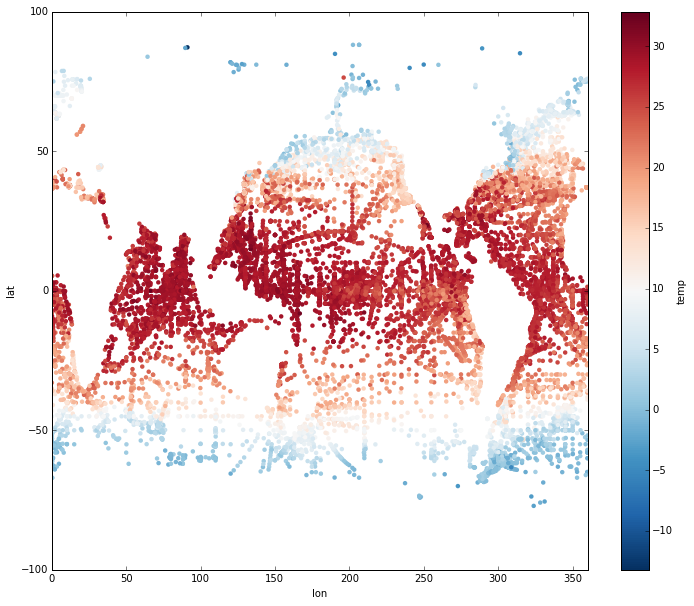

In [45]:
# scatter plot of all the floats
fig, ax = plt.subplots(figsize=(12,10))
df_init.plot(kind='scatter', x='lon', y='lat', c='temp',
             cmap='RdBu_r',edgecolor='none', ax=ax)
ax.set_xlim([0,360])

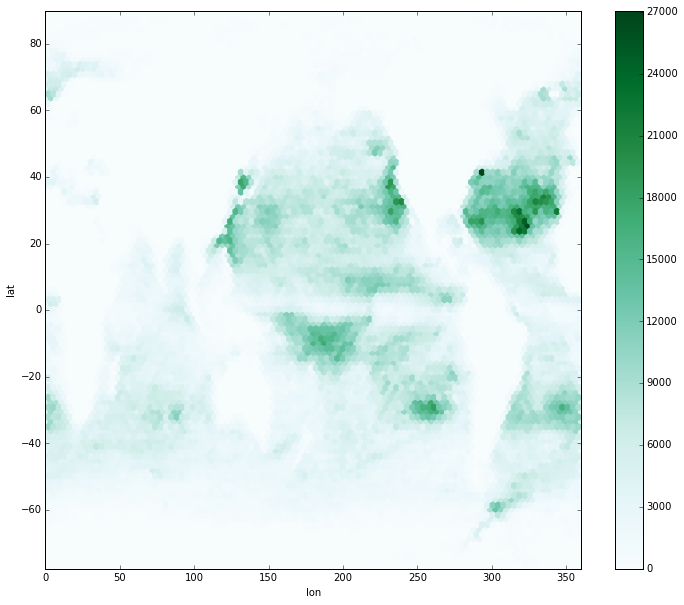

In [46]:
# what is the density like?
fig, ax = plt.subplots(figsize=(12,10))
# this uses ALL the obs
df.plot.hexbin('lon', 'lat', gridsize=100, ax=ax)

On the West. The Eastern limit of the Gulf of Aden [The meridian of Cape Guardafui (Ras Asir, 51°16'E)].

On the North. A line joining Ràs al Hadd, East point of Arabia (22°32'N) and Ràs Jiyùni (61°43'E) on the coast of Pakistan.

On the South. A line running from the South extremity of Addu Atoll (Maldives), to the Eastern extreme of Ràs Hafun (Africa, 10°26'N).

On the East. The Western limit of the Laccadive Sea [A line running from Sadashivgad Lt. on West Coast of India (14°48′N 74°07′E) to Corah Divh (13°42′N 72°10′E) and thence down the West side of the Laccadive and Maldive Archipelagos to the most Southerly point of Addu Atoll in the Maldives].

In [89]:
arabian_sea = (df.lon>51) & (df.lon<74) & (df.lat>10) & (df.lat<25)
floats = df.loc[arabian_sea]

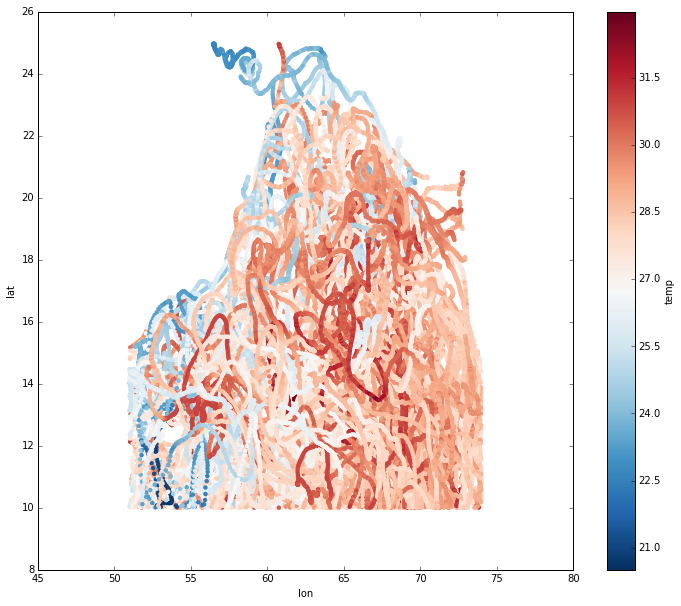

In [90]:
fig, ax = plt.subplots(figsize=(12,10))
floats.plot(kind='scatter', x='lon', y='lat', c='temp',
             cmap='RdBu_r',edgecolor='none', ax=ax)
